In [1]:
import pandas as pd
import numpy as np
import os
import graphlab as gl
import graphlab.aggregate as agg
import math
from graphlab import SFrame
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
%matplotlib inline

In [2]:
import sys
reload(sys)
sys.setdefaultencoding('utf8')

In [3]:
gl.canvas.set_target('ipynb')

In [4]:
df=pd.read_excel('Online Retail.xlsx')
df=df.dropna(axis=0, how='any')
len(df)

406829

In [5]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,406829.000000,406829.000000,406829.000000
mean,12.061303,3.460471,15287.690570
std,248.693370,69.315162,1713.600303
min,-80995.000000,0.000000,12346.000000
25%,2.000000,1.250000,13953.000000
50%,5.000000,1.950000,15152.000000
75%,12.000000,3.750000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [6]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [7]:
df.dtypes

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
dtype: object

In [8]:
df['StockCode']= df['StockCode'].astype(str)
df['Description']= df['Description'].astype(object)
df['CustomerID']= df['CustomerID'].astype(object)
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom


In [9]:
len(df)

406829

In [10]:
df.groupby('StockCode').count()

,InvoiceNo,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
StockCode,,,,,,,
10002,49,49,49,49,49,49,49
10080,21,21,21,21,21,21,21
10120,30,30,30,30,30,30,30
10123C,3,3,3,3,3,3,3
10124A,5,5,5,5,5,5,5
10124G,4,4,4,4,4,4,4
10125,64,64,64,64,64,64,64
10133,125,125,125,125,125,125,125
10135,122,122,122,122,122,122,122


In [11]:
df['StockCode'].value_counts()

85123A    2077
22423     1905
85099B    1662
84879     1418
47566     1416
20725     1359
22720     1232
POST      1196
20727     1126
22197     1118
23203     1115
22383     1103
21212     1080
23209     1040
23298     1036
22086     1029
22382     1021
20728     1012
22457      997
22469      996
22384      977
22960      974
21034      955
22727      932
23206      907
82482      905
22386      903
22993      902
22138      894
22666      890
          ... 
90021        1
21839        1
90100        1
90162A       1
84809B       1
90181A       1
90039A       1
90039C       1
90039B       1
90167        1
20964        1
90199B       1
17001        1
90025F       1
90104        1
90102        1
84206B       1
35916B       1
82615        1
84613C       1
79323W       1
90197B       1
85109        1
84773        1
85023C       1
90176C       1
90176B       1
84743C       1
90011A       1
90187B       1
Name: StockCode, Length: 3684, dtype: int64

In [12]:
df['CustomerID'].value_counts()

17841.0    7983
14911.0    5903
14096.0    5128
12748.0    4642
14606.0    2782
15311.0    2491
14646.0    2085
13089.0    1857
13263.0    1677
14298.0    1640
15039.0    1508
14156.0    1420
18118.0    1284
14159.0    1212
14796.0    1165
15005.0    1160
16033.0    1152
14056.0    1128
14769.0    1094
17511.0    1076
13081.0    1061
14527.0    1011
16549.0     981
14456.0     977
15719.0     938
15555.0     925
16931.0     898
17811.0     872
14505.0     803
12415.0     778
           ... 
15590.0       1
16078.0       1
16093.0       1
13703.0       1
18068.0       1
14705.0       1
16138.0       1
16144.0       1
16148.0       1
15562.0       1
15524.0       1
12503.0       1
12505.0       1
15510.0       1
15316.0       1
17956.0       1
17948.0       1
16323.0       1
14090.0       1
17925.0       1
17923.0       1
16428.0       1
14119.0       1
15389.0       1
15369.0       1
13391.0       1
16579.0       1
13366.0       1
17763.0       1
17846.0       1
Name: CustomerID, Length

In [13]:
stockcode=df['StockCode'].value_counts()

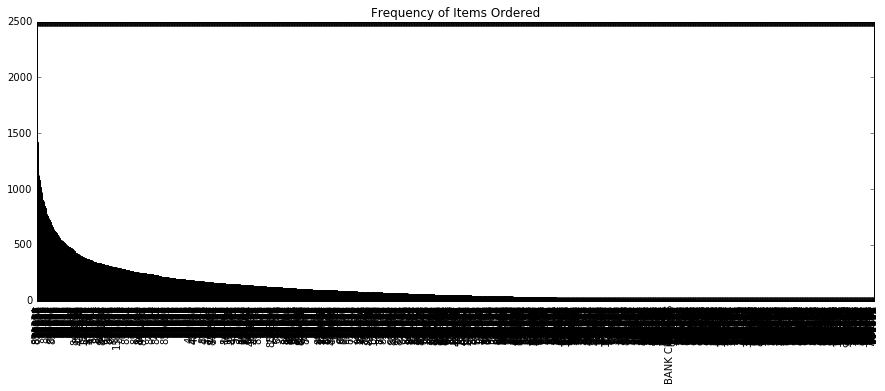

In [14]:
stockcode.plot.bar(figsize=(15,5))
plt.title('Frequency of Items Ordered');

In [15]:
df.drop(["UnitPrice", "InvoiceNo"], axis=1, inplace=True)
df.head()

,StockCode,Description,Quantity,InvoiceDate,CustomerID,Country
0,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,17850,United Kingdom
1,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,17850,United Kingdom
2,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,17850,United Kingdom
3,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,17850,United Kingdom
4,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,17850,United Kingdom


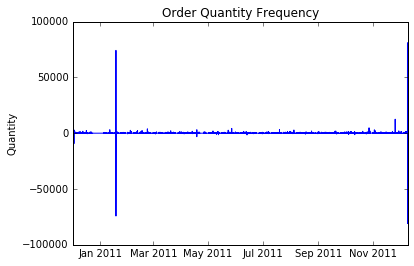

In [16]:
plt.plot(df.InvoiceDate, df.Quantity)
plt.ylabel('Quantity')
plt.title('Order Quantity Frequency')
plt.show()

In [17]:
country=df['Country'].value_counts()
country

United Kingdom          361878
Germany                   9495
France                    8491
EIRE                      7485
Spain                     2533
Netherlands               2371
Belgium                   2069
Switzerland               1877
Portugal                  1480
Australia                 1259
Norway                    1086
Italy                      803
Channel Islands            758
Finland                    695
Cyprus                     622
Sweden                     462
Austria                    401
Denmark                    389
Japan                      358
Poland                     341
USA                        291
Israel                     250
Unspecified                244
Singapore                  229
Iceland                    182
Canada                     151
Greece                     146
Malta                      127
United Arab Emirates        68
European Community          61
RSA                         58
Lebanon                     45
Lithuani

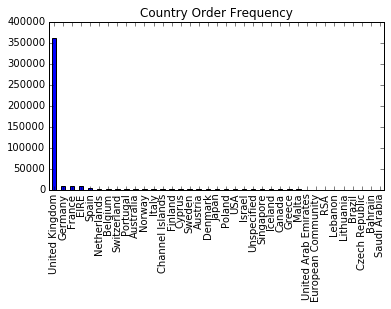

In [18]:
country.plot.bar(figsize=(6,3))
plt.title('Country Order Frequency')
plt.show();

In [19]:
df['Items']= df['StockCode']+' : '+df['Description'].astype(str)
df.drop(["StockCode", "Description", "InvoiceDate", "Country"], axis=1, inplace=True)
df.head()

,Quantity,CustomerID,Items
0,6,17850,85123A : WHITE HANGING HEART T-LIGHT HOLDER
1,6,17850,71053 : WHITE METAL LANTERN
2,8,17850,84406B : CREAM CUPID HEARTS COAT HANGER
3,6,17850,84029G : KNITTED UNION FLAG HOT WATER BOTTLE
4,6,17850,84029E : RED WOOLLY HOTTIE WHITE HEART.


In [20]:
items=df['Items'].value_counts()
items

85123A : WHITE HANGING HEART T-LIGHT HOLDER     2070
22423 : REGENCY CAKESTAND 3 TIER                1905
85099B : JUMBO BAG RED RETROSPOT                1662
84879 : ASSORTED COLOUR BIRD ORNAMENT           1418
47566 : PARTY BUNTING                           1416
20725 : LUNCH BAG RED RETROSPOT                 1358
22720 : SET OF 3 CAKE TINS PANTRY DESIGN        1232
POST : POSTAGE                                  1196
20727 : LUNCH BAG  BLACK SKULL.                 1126
21212 : PACK OF 72 RETROSPOT CAKE CASES         1080
22086 : PAPER CHAIN KIT 50'S CHRISTMAS          1029
23298 : SPOTTY BUNTING                          1029
22382 : LUNCH BAG SPACEBOY DESIGN               1021
20728 : LUNCH BAG CARS BLUE                     1012
22457 : NATURAL SLATE HEART CHALKBOARD           997
22469 : HEART OF WICKER SMALL                    996
22384 : LUNCH BAG PINK POLKADOT                  977
22960 : JAM MAKING SET WITH JARS                 974
21034 : REX CASH+CARRY JUMBO SHOPPER          

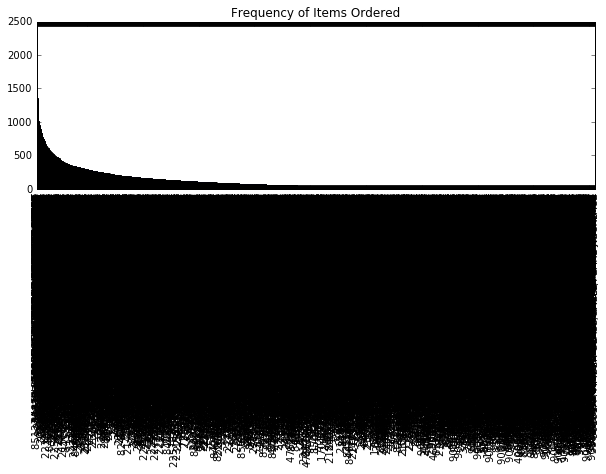

In [21]:
items.plot.bar(figsize=(10,3))
plt.title('Frequency of Items Ordered');

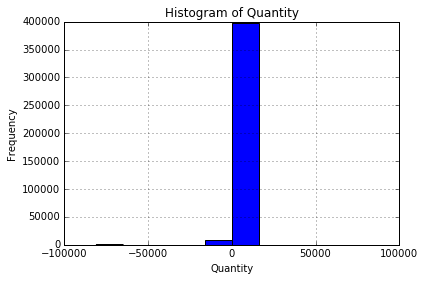

In [22]:
df.Quantity.hist()
plt.title('Histogram of Quantity')
plt.xlabel('Quantity')
plt.ylabel('Frequency');

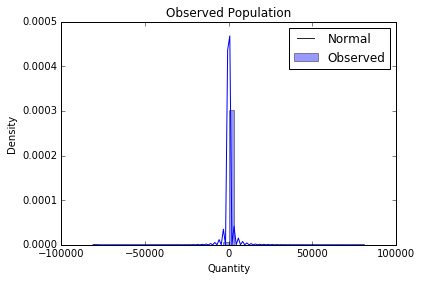

In [23]:
_= sns.distplot(df['Quantity'], kde=True, fit=stats.gamma)
_= plt.xlabel('Quantity')
_= plt.ylabel('Density')
_= plt.title('Observed Population')
_= plt.legend(('Normal', 'Observed'))
plt.show()

In [24]:
df.dtypes

Quantity       int64
CustomerID    object
Items         object
dtype: object

In [25]:
df.groupby('Items').count()

,Quantity,CustomerID
Items,,
10002 : INFLATABLE POLITICAL GLOBE,49,49
10080 : GROOVY CACTUS INFLATABLE,21,21
10120 : DOGGY RUBBER,30,30
10123C : HEARTS WRAPPING TAPE,3,3
10124A : SPOTS ON RED BOOKCOVER TAPE,5,5
10124G : ARMY CAMO BOOKCOVER TAPE,4,4
10125 : MINI FUNKY DESIGN TAPES,64,64
10133 : COLOURING PENCILS BROWN TUBE,125,125
10135 : COLOURING PENCILS BROWN TUBE,122,122


In [26]:
sf=SFrame(data=df)
sf

Quantity,CustomerID,Items
6,17850.0,85123A : WHITE HANGINGHEART T-LIGHT HOLDER ...
6,17850.0,71053 : WHITE METALLANTERN ...
8,17850.0,84406B : CREAM CUPIDHEARTS COAT HANGER ...
6,17850.0,84029G : KNITTED UNIONFLAG HOT WATER BOTTLE ...
6,17850.0,84029E : RED WOOLLYHOTTIE WHITE HEART. ...
2,17850.0,22752 : SET 7 BABUSHKANESTING BOXES ...
6,17850.0,21730 : GLASS STARFROSTED T-LIGHT HOLDER ...
6,17850.0,22633 : HAND WARMER UNIONJACK ...
6,17850.0,22632 : HAND WARMER REDPOLKA DOT ...
32,13047.0,84879 : ASSORTED COLOURBIRD ORNAMENT ...


In [27]:
sf.dtype()

[int, float, str]

In [28]:
sf['CustomerID']=sf['CustomerID'].astype(int)
sf['Items']=sf['Items'].astype(str)
len(sf)

406829

In [29]:
sf=sf.dropna(how='all')
len(sf)

406829

In [30]:
data=sf.groupby(['CustomerID', 'Items'],operations={'totalquantity': agg.SUM('Quantity'), 'meanquantity': agg.AVG('Quantity'), 'stdquantity': agg.STD('Quantity')})
data['meanquantity']=data['meanquantity'].astype(float)
data['stdquantity']=data['stdquantity'].astype(float)
data['totalquantity']=data['totalquantity'].astype(float)
data.show

<bound method SFrame.show of Columns:
	CustomerID	int
	Items	str
	meanquantity	float
	totalquantity	float
	stdquantity	float

Rows: 269270

Data:
+------------+-------------------------------+--------------+---------------+
| CustomerID |             Items             | meanquantity | totalquantity |
+------------+-------------------------------+--------------+---------------+
|   17841    | 15060B : FAIRY CAKE DESIGN... |     0.8      |      8.0      |
|   15150    | 85066 : CREAM SWEETHEART M... |     2.0      |      2.0      |
|   18188    | 84997D : CHILDRENS CUTLERY... |     4.0      |      4.0      |
|   14410    | 22431 : WATERING CAN BLUE ... |     1.5      |      3.0      |
|   15022    | 21619 : 4 VANILLA BOTANICA... |     4.0      |      4.0      |
|   16674    | 22974 : CHILDRENS DOLLY GI... |     4.0      |      4.0      |
|   13317    |  22629 : SPACEBOY LUNCH BOX   |     12.0     |      12.0     |
|   16242    |  48187 : DOORMAT NEW ENGLAND  |     1.5      |      3.0    

In [31]:
data=data.filter_by([0.0], 'stdquantity', exclude='True')
data=data['CustomerID','Items','totalquantity','meanquantity','stdquantity']

In [32]:
data['zquantity']= ((data['totalquantity']-data['meanquantity']) / data['stdquantity'])
data['zquantity']=data['zquantity'].astype(float)
data

CustomerID,Items,totalquantity,meanquantity,stdquantity,zquantity
17841,15060B : FAIRY CAKEDESIGN UMBRELLA ...,8.0,0.8,0.6,12.0
14410,22431 : WATERING CAN BLUEELEPHANT ...,3.0,1.5,0.5,3.0
16242,48187 : DOORMAT NEWENGLAND ...,3.0,1.5,0.5,3.0
15039,22553 : PLASTERS IN TINSKULLS ...,9.0,1.125,0.330718913883,23.8117617996
16809,22417 : PACK OF 60SPACEBOY CAKE CASES ...,19.0,4.75,1.63935963108,8.69241850896
17961,11001 : ASSTD DESIGNRACING CAR PEN ...,11.0,3.66666666667,2.49443825785,2.93987366104
16407,21745 : GAOLERS KEYSDECORATIVE GARDEN ...,6.0,3.0,1.0,3.0
16029,22569 : FELTCRAFT CUSHIONBUTTERFLY ...,432.0,108.0,174.310068556,1.85875665522
13081,21485 : RETROSPOT HEARTHOT WATER BOTTLE ...,18.0,9.0,3.0,3.0
17671,23250 : VINTAGE RED TRIMENAMEL BOWL ...,0.0,0.0,24.0,0.0


In [33]:
data['totalquantity']=data['totalquantity'].astype(float)
data['meanquantity']=data['meanquantity'].astype(float)
data['stdquantity']=data['stdquantity'].astype(float)
data['zquantity']=data['zquantity'].astype(float)

In [34]:
data['CustomerID'].unique()

dtype: int
Rows: 2831
[14515L, 17338L, 15615L, 16284L, 16261L, 16619L, 16370L, 15910L, 17035L, 16249L, 17169L, 15068L, 16477L, 16727L, 17696L, 15291L, 16009L, 16187L, 14813L, 16309L, 15111L, 14775L, 15005L, 15443L, 16399L, 16601L, 12481L, 12809L, 15465L, 16558L, 16523L, 16513L, 12875L, 18218L, 13421L, 14665L, 12657L, 16648L, 16172L, 13862L, 17584L, 15433L, 17371L, 13631L, 17856L, 18212L, 14759L, 14262L, 14107L, 12449L, 15152L, 13929L, 16411L, 16473L, 12516L, 17735L, 14472L, 18167L, 16358L, 17049L, 16306L, 17837L, 13373L, 15241L, 17457L, 15023L, 14125L, 13771L, 14930L, 14047L, 14352L, 16045L, 13310L, 14562L, 16647L, 17951L, 15796L, 15579L, 16018L, 17320L, 16367L, 16700L, 13856L, 13102L, 15392L, 13097L, 16317L, 15298L, 14068L, 15349L, 17770L, 12678L, 14291L, 16624L, 14338L, 13587L, 17968L, 16330L, 17646L, 16422L, ... ]

In [35]:
data['Items'].unique()

dtype: str
Rows: 2936
['21245 : GREEN POLKADOT PLATE ', '37450 : CERAMIC CAKE BOWL + HANGING CAKES', '82483 : WOOD 2 DRAWER CABINET WHITE FINISH', '23530 : WALL ART ONLY ONE PERSON ', '23475 : WOODLAND SMALL PINK FELT HEART', '23263 : SET OF 3 WOODEN HEART DECORATIONS', '23388 : WOODLAND MINI BACKPACK', '84970L : SINGLE HEART ZINC T-LIGHT HOLDER', '23691 : WRAP KEEP CALM BIRTHDAY', '23294 : SET OF 6 SNACK LOAF BAKING CASES', '22959 : WRAP CHRISTMAS VILLAGE', '23045 : PAPER LANTERN 5 POINT STAR MOON ', '22690 : DOORMAT HOME SWEET HOME BLUE ', '22754 : SMALL RED BABUSHKA NOTEBOOK ', '23403 : LETTER HOLDER HOME SWEET HOME', '23575 : SNACK TRAY PAISLEY PARK', '23236 : STORAGE TIN VINTAGE DOILY ', '85178 : VICTORIAN SEWING KIT', '21201 : TROPICAL  HONEYCOMB PAPER GARLAND ', '84978 : HANGING HEART JAR T-LIGHT HOLDER', '21143 : ANTIQUE GLASS HEART DECORATION ', '21479 : WHITE SKULL HOT WATER BOTTLE ', '21647 : ASSORTED TUTTI FRUTTI LARGE PURSE', '23523 : TREASURE AHOY WALL ART', '71477 : COLO

In [36]:
data['CustomerID'].show()

In [37]:
data['Items'].show()

In [38]:
users= data['CustomerID'].unique()
users.show()
items= data['Items'].unique()
items.show()

In [39]:
data['CustomerID','Items'].show()

In [40]:
m=gl.recommender.create(data, user_id='CustomerID', item_id='Items', target='totalquantity', ranking='True')
m.show()

Recsys training: model = ranking_factorization_recommender

Preparing data set.

Data has 42293 observations with 2831 users and 2936 items.

Data prepared in: 0.059674s

Training ranking_factorization_recommender for recommendations.

+--------------------------------+--------------------------------------------------+----------+

| Parameter                      | Description                                      | Value    |

+--------------------------------+--------------------------------------------------+----------+

| num_factors                    | Factor Dimension                                 | 32       |

| regularization                 | L2 Regularization on Factors                     | 1e-009   |

| solver                         | Solver used for training                         | adagrad  |

| linear_regularization          | L2 Regularization on Linear Coefficients         | 1e-009   |

| ranking_regularization         | Rank-based Regularization Weight                 | 0.25     |

| max_iterations                 | Maximum Number of Iterations                     | 25       |

+--------------------------------+--------------------------------------------------+----------+

Optimizing model using SGD; tuning step size.

Using 10000 / 42293 points for tuning the step size.

+---------+-------------------+------------------------------------------+

| Attempt | Initial Step Size | Estimated Objective Value                |

+---------+-------------------+------------------------------------------+

| 0       | 10                | Not Viable                               |

| 1       | 2.5               | Not Viable                               |

| 2       | 0.625             | Not Viable                               |

| 3       | 0.15625           | 57744.2                                  |

| 4       | 0.078125          | 65891.7                                  |

| 5       | 0.0390625         | 75477.3                                  |

| 6       | 0.0195312         | 80162.6                                  |

+---------+-------------------+------------------------------------------+

| Final   | 0.15625           | 57744.2                                  |

+---------+-------------------+------------------------------------------+

Starting Optimization.

+---------+--------------+-------------------+-----------------------+-------------+

| Iter.   | Elapsed Time | Approx. Objective | Approx. Training RMSE | Step Size   |

+---------+--------------+-------------------+-----------------------+-------------+

| Initial | 0us          | 83660.2           | 206.578               |             |

+---------+--------------+-------------------+-----------------------+-------------+

| 1       | 73.095ms     | DIVERGED          | DIVERGED              | 0.15625     |

| RESET   | 96.085ms     | 83660             | 206.578               |             |

| 1       | 163.566ms    | 71004.5           | 158.445               | 0.078125    |

| 2       | 231.13ms     | 72195.9           | 155.079               | 0.078125    |

| 3       | 299.451ms    | 70423             | 148.955               | 0.078125    |

| 4       | 367.696ms    | 69437.3           | 144.834               | 0.078125    |

| 5       | 436.153ms    | 70122.8           | 144.415               | 0.078125    |

| 6       | 488.021ms    | 67630.3           | 137.31                | 0.078125    |

| 11      | 806.331ms    | 65760             | 129.153               | 0.078125    |

| 24      | 1.65s        | 66103.3           | 127.644               | 0.078125    |

+---------+--------------+-------------------+-----------------------+-------------+

Optimization Complete: Maximum number of passes through the data reached.

Computing final objective value and training RMSE.

Final objective value: 66154.6

Final training RMSE: 127.619

In [41]:
m.evaluate_rmse(dataset=data, target='totalquantity')

{'rmse_by_item': Columns:
 	Items	str
 	count	int
 	rmse	float
 
 Rows: 2936
 
 Data:
 +--------------------------------+-------+---------------+
 |             Items              | count |      rmse     |
 +--------------------------------+-------+---------------+
 | 21245 : GREEN POLKADOT PLATE   |   7   | 41.0718455595 |
 | 37450 : CERAMIC CAKE BOWL ...  |   14  | 54.1362082129 |
 | 82483 : WOOD 2 DRAWER CABI...  |   87  | 37.1749244444 |
 | 23530 : WALL ART ONLY ONE ...  |   6   | 52.0404155681 |
 | 23475 : WOODLAND SMALL PIN...  |   1   | 3.59705057115 |
 | 23263 : SET OF 3 WOODEN HE...  |   44  | 56.7034367613 |
 | 23388 : WOODLAND MINI BACKPACK |   9   | 49.2652258059 |
 | 84970L : SINGLE HEART ZINC...  |   32  | 33.7716380527 |
 | 23691 : WRAP KEEP CALM BIR...  |   1   | 370.883514756 |
 | 23294 : SET OF 6 SNACK LOA...  |   35  | 124.188332708 |
 +--------------------------------+-------+---------------+
 [2936 rows x 3 columns]
 Note: Only the head of the SFrame is printed.
 Y

In [42]:
recs=m.recommend(users,k=20)

recommendations finished on 1000/2831 queries. users per second: 11575.8

recommendations finished on 2000/2831 queries. users per second: 13007.5

In [43]:
train, test = gl.recommender.util.random_split_by_user(data,
                                                             user_id='CustomerID',
                                                             item_id='Items')

In [44]:
factorization = gl.recommender.factorization_recommender.create(train,user_id='CustomerID',item_id='Items',target='totalquantity')

rfactorization= gl.recommender.ranking_factorization_recommender.create(train,target='totalquantity',user_id='CustomerID',item_id='Items',ranking_regularization=0.25)

popularity=gl.recommender.popularity_recommender.create(train,user_id='CustomerID',item_id='Items',target='totalquantity')

itemsimilarity=gl.recommender.item_similarity_recommender.create(train,user_id='CustomerID',item_id='Items',target='totalquantity')

Recsys training: model = factorization_recommender

Preparing data set.

Data has 39764 observations with 2781 users and 2920 items.

Data prepared in: 0.085806s

Training factorization_recommender for recommendations.

+--------------------------------+--------------------------------------------------+----------+

| Parameter                      | Description                                      | Value    |

+--------------------------------+--------------------------------------------------+----------+

| num_factors                    | Factor Dimension                                 | 8        |

| regularization                 | L2 Regularization on Factors                     | 1e-008   |

| solver                         | Solver used for training                         | adagrad  |

| linear_regularization          | L2 Regularization on Linear Coefficients         | 1e-010   |

| max_iterations                 | Maximum Number of Iterations                     | 50       |

+--------------------------------+--------------------------------------------------+----------+

Optimizing model using SGD; tuning step size.

Using 10000 / 39764 points for tuning the step size.

+---------+-------------------+------------------------------------------+

| Attempt | Initial Step Size | Estimated Objective Value                |

+---------+-------------------+------------------------------------------+

| 0       | 10                | Not Viable                               |

| 1       | 2.5               | Not Viable                               |

| 2       | 0.625             | Not Viable                               |

| 3       | 0.15625           | 23667.4                                  |

| 4       | 0.078125          | 33718.1                                  |

| 5       | 0.0390625         | 36240.6                                  |

| 6       | 0.0195312         | 43851.8                                  |

+---------+-------------------+------------------------------------------+

| Final   | 0.15625           | 23667.4                                  |

+---------+-------------------+------------------------------------------+

Starting Optimization.

+---------+--------------+-------------------+-----------------------+-------------+

| Iter.   | Elapsed Time | Approx. Objective | Approx. Training RMSE | Step Size   |

+---------+--------------+-------------------+-----------------------+-------------+

| Initial | 0us          | 44080.1           | 209.953               |             |

+---------+--------------+-------------------+-----------------------+-------------+

| 1       | 39.695ms     | 38686             | 196.688               | 0.15625     |

| 2       | 91.745ms     | 37126.8           | 192.683               | 0.15625     |

| 3       | 129.097ms    | 40704.3           | 201.753               | 0.15625     |

| 4       | 173.85ms     | 38924.2           | 197.292               | 0.15625     |

| 5       | 218.747ms    | 38229.9           | 195.525               | 0.15625     |

| 6       | 254.983ms    | 37207.7           | 192.893               | 0.15625     |

| 11      | 463.096ms    | 34054.2           | 184.538               | 0.15625     |

| 25      | 1.01s        | 33330.9           | 182.568               | 0.15625     |

| 48      | 1.96s        | DIVERGED          | DIVERGED              | 0.15625     |

| RESET   | 1.96s        | 44080             | 209.952               |             |

| 2       | 2.03s        | 25419.6           | 159.435               | 0.078125    |

| 4       | 2.11s        | 29011.6           | 170.328               | 0.078125    |

+---------+--------------+-------------------+-----------------------+-------------+

Optimization Complete: Maximum number of passes through the data reached (hard limit).

Computing final objective value and training RMSE.

Final objective value: 31363.4

Final training RMSE: 177.097

Recsys training: model = ranking_factorization_recommender

Preparing data set.

Data has 39764 observations with 2781 users and 2920 items.

Data prepared in: 0.058819s

Training ranking_factorization_recommender for recommendations.

+--------------------------------+--------------------------------------------------+----------+

| Parameter                      | Description                                      | Value    |

+--------------------------------+--------------------------------------------------+----------+

| num_factors                    | Factor Dimension                                 | 32       |

| regularization                 | L2 Regularization on Factors                     | 1e-009   |

| solver                         | Solver used for training                         | adagrad  |

| linear_regularization          | L2 Regularization on Linear Coefficients         | 1e-009   |

| ranking_regularization         | Rank-based Regularization Weight                 | 0.25     |

| max_iterations                 | Maximum Number of Iterations                     | 25       |

+--------------------------------+--------------------------------------------------+----------+

Optimizing model using SGD; tuning step size.

Using 10000 / 39764 points for tuning the step size.

+---------+-------------------+------------------------------------------+

| Attempt | Initial Step Size | Estimated Objective Value                |

+---------+-------------------+------------------------------------------+

| 0       | 10                | Not Viable                               |

| 1       | 2.5               | Not Viable                               |

| 2       | 0.625             | Not Viable                               |

| 3       | 0.15625           | 69460.8                                  |

| 4       | 0.078125          | 75971.4                                  |

| 5       | 0.0390625         | 72092                                    |

| 6       | 0.0195312         | 76334.9                                  |

+---------+-------------------+------------------------------------------+

| Final   | 0.15625           | 69460.8                                  |

+---------+-------------------+------------------------------------------+

Starting Optimization.

+---------+--------------+-------------------+-----------------------+-------------+

| Iter.   | Elapsed Time | Approx. Objective | Approx. Training RMSE | Step Size   |

+---------+--------------+-------------------+-----------------------+-------------+

| Initial | 0us          | 86415.7           | 209.953               |             |

+---------+--------------+-------------------+-----------------------+-------------+

| 1       | 48.153ms     | 91109.4           | 212.414               | 0.15625     |

| 2       | 115.641ms    | 89664.7           | 203.19                | 0.15625     |

| 3       | 183.28ms     | 90077.1           | 201.065               | 0.15625     |

| 4       | 246.256ms    | 85525.7           | 187.781               | 0.15625     |

| 5       | 306.497ms    | 83321.6           | 179.942               | 0.15625     |

| 6       | 363.268ms    | 81791.5           | 174.289               | 0.15625     |

| 11      | 666.015ms    | 78759.6           | 159.176               | 0.15625     |

| 25      | 1.48s        | 74844.1           | 140.861               | 0.15625     |

+---------+--------------+-------------------+-----------------------+-------------+

Optimization Complete: Maximum number of passes through the data reached.

Computing final objective value and training RMSE.

Final objective value: 74448.5

Final training RMSE: 139.562

Recsys training: model = popularity

Warning: Ignoring columns meanquantity, stdquantity, zquantity;

To use these columns in scoring predictions, use a model that allows the use of additional features.

Preparing data set.

Data has 39764 observations with 2781 users and 2920 items.

Data prepared in: 0.024148s

39764 observations to process; with 2920 unique items.

Recsys training: model = item_similarity

Warning: Ignoring columns meanquantity, stdquantity, zquantity;

To use these columns in scoring predictions, use a model that allows the use of additional features.

Preparing data set.

Data has 39764 observations with 2781 users and 2920 items.

Data prepared in: 0.028252s

Training model from provided data.

Gathering per-item and per-user statistics.

+--------------------------------+------------+

| Elapsed Time (Item Statistics) | % Complete |

+--------------------------------+------------+

| 0us                            | 35.75      |

| 0us                            | 100        |

+--------------------------------+------------+

Setting up lookup tables.

Processing data in one pass using dense lookup tables.

+-------------------------------------+------------------+-----------------+

| Elapsed Time (Constructing Lookups) | Total % Complete | Items Processed |

+-------------------------------------+------------------+-----------------+

| 22.352ms                            | 12.25            | 361             |

| 67.127ms                            | 100              | 2920            |

+-------------------------------------+------------------+-----------------+

Finalizing lookup tables.

Generating candidate set for working with new users.

Finished training in 0.073773s

In [45]:
factorization.evaluate_rmse(dataset=data,target='totalquantity')

{'rmse_by_item': Columns:
 	Items	str
 	count	int
 	rmse	float
 
 Rows: 2936
 
 Data:
 +--------------------------------+-------+---------------+
 |             Items              | count |      rmse     |
 +--------------------------------+-------+---------------+
 | 21245 : GREEN POLKADOT PLATE   |   7   | 40.5183761097 |
 | 37450 : CERAMIC CAKE BOWL ...  |   14  | 37.1503475152 |
 | 82483 : WOOD 2 DRAWER CABI...  |   87  | 30.0675110523 |
 | 23530 : WALL ART ONLY ONE ...  |   6   | 87.2890526403 |
 | 23475 : WOODLAND SMALL PIN...  |   1   | 3.21625108149 |
 | 23263 : SET OF 3 WOODEN HE...  |   44  |  45.806607843 |
 | 23388 : WOODLAND MINI BACKPACK |   9   |  40.280901662 |
 | 84970L : SINGLE HEART ZINC...  |   32  | 37.8820645148 |
 | 23691 : WRAP KEEP CALM BIR...  |   1   | 238.877994797 |
 | 23294 : SET OF 6 SNACK LOA...  |   35  | 93.9714384766 |
 +--------------------------------+-------+---------------+
 [2936 rows x 3 columns]
 Note: Only the head of the SFrame is printed.
 Y

In [46]:
rfactorization.evaluate_rmse(dataset=data,target='totalquantity')

{'rmse_by_item': Columns:
 	Items	str
 	count	int
 	rmse	float
 
 Rows: 2936
 
 Data:
 +--------------------------------+-------+---------------+
 |             Items              | count |      rmse     |
 +--------------------------------+-------+---------------+
 | 21245 : GREEN POLKADOT PLATE   |   7   | 41.4001802591 |
 | 37450 : CERAMIC CAKE BOWL ...  |   14  | 64.5491740497 |
 | 82483 : WOOD 2 DRAWER CABI...  |   87  | 43.5299173635 |
 | 23530 : WALL ART ONLY ONE ...  |   6   | 49.1284426412 |
 | 23475 : WOODLAND SMALL PIN...  |   1   |  3.9445649275 |
 | 23263 : SET OF 3 WOODEN HE...  |   44  | 62.4240203833 |
 | 23388 : WOODLAND MINI BACKPACK |   9   | 66.3281789994 |
 | 84970L : SINGLE HEART ZINC...  |   32  | 35.3466735561 |
 | 23691 : WRAP KEEP CALM BIR...  |   1   | 492.525141972 |
 | 23294 : SET OF 6 SNACK LOA...  |   35  | 150.694590326 |
 +--------------------------------+-------+---------------+
 [2936 rows x 3 columns]
 Note: Only the head of the SFrame is printed.
 Y

In [47]:
popularity.evaluate_rmse(dataset=data,target='totalquantity')

{'rmse_by_item': Columns:
 	Items	str
 	count	int
 	rmse	float
 
 Rows: 2936
 
 Data:
 +--------------------------------+-------+---------------+
 |             Items              | count |      rmse     |
 +--------------------------------+-------+---------------+
 | 21245 : GREEN POLKADOT PLATE   |   7   | 33.6767345356 |
 | 37450 : CERAMIC CAKE BOWL ...  |   14  | 35.0085590442 |
 | 82483 : WOOD 2 DRAWER CABI...  |   87  | 23.3367026952 |
 | 23530 : WALL ART ONLY ONE ...  |   6   | 184.298670641 |
 | 23475 : WOODLAND SMALL PIN...  |   1   |      0.0      |
 | 23263 : SET OF 3 WOODEN HE...  |   44  | 51.6327671845 |
 | 23388 : WOODLAND MINI BACKPACK |   9   | 60.2734509456 |
 | 84970L : SINGLE HEART ZINC...  |   32  | 55.8040993118 |
 | 23691 : WRAP KEEP CALM BIR...  |   1   |      0.0      |
 | 23294 : SET OF 6 SNACK LOA...  |   35  | 105.951454656 |
 +--------------------------------+-------+---------------+
 [2936 rows x 3 columns]
 Note: Only the head of the SFrame is printed.
 Y

In [48]:
itemsimilarity.evaluate_rmse(dataset=data,target='totalquantity')

{'rmse_by_item': Columns:
 	Items	str
 	count	int
 	rmse	float
 
 Rows: 2936
 
 Data:
 +--------------------------------+-------+---------------+
 |             Items              | count |      rmse     |
 +--------------------------------+-------+---------------+
 | 21245 : GREEN POLKADOT PLATE   |   7   | 44.5092557501 |
 | 37450 : CERAMIC CAKE BOWL ...  |   14  | 46.4356766086 |
 | 82483 : WOOD 2 DRAWER CABI...  |   87  | 27.8448402262 |
 | 23530 : WALL ART ONLY ONE ...  |   6   | 221.550667764 |
 | 23475 : WOODLAND SMALL PIN...  |   1   | 35.9359882172 |
 | 23263 : SET OF 3 WOODEN HE...  |   44  | 61.6097860707 |
 | 23388 : WOODLAND MINI BACKPACK |   9   | 67.8791496407 |
 | 84970L : SINGLE HEART ZINC...  |   32  | 77.7242729078 |
 | 23691 : WRAP KEEP CALM BIR...  |   1   | 224.976433554 |
 | 23294 : SET OF 6 SNACK LOA...  |   35  | 121.407745629 |
 +--------------------------------+-------+---------------+
 [2936 rows x 3 columns]
 Note: Only the head of the SFrame is printed.
 Y

In [49]:
#Get recommendations for first 5 users and print them
#users = range(1,6) specifies user ID of first 5 users
#k=5 specifies top 5 recommendations to be given

factorizationeval = factorization.recommend(users=range(1,6),k=5)
factorizationeval.print_rows(num_rows=25)

rfactorizationeval = rfactorization.recommend(users=range(1,6),k=5)
rfactorizationeval.print_rows(num_rows=25)

popularityeval = popularity.recommend(users=range(1,6),k=5)
popularityeval.print_rows(num_rows=25)

itemsimilarityeval = itemsimilarity.recommend(users=range(1,6),k=5)
itemsimilarityeval.print_rows(num_rows=25)

In [50]:
model_compare= gl.compare(test, [m, factorization,rfactorization,popularity,itemsimilarity])
model_compare.show

<bound method SFrame.show of Columns:
	dataset	str
	metric	str
	model	str
	model_type	str
	results	dict

Rows: 5

Data:
+---------+------------------+----------------+-------------------------------+
| dataset |      metric      |     model      |           model_type          |
+---------+------------------+----------------+-------------------------------+
|   test  | precision_recall |       m        | RankingFactorizationRecomm... |
|   test  | precision_recall | factorization  |    FactorizationRecommender   |
|   test  | precision_recall | rfactorization | RankingFactorizationRecomm... |
|   test  | precision_recall |   popularity   |     PopularityRecommender     |
|   test  | precision_recall | itemsimilarity |   ItemSimilarityRecommender   |
+---------+------------------+----------------+-------------------------------+
+-------------------------------+
|            results            |
+-------------------------------+
| {'precision_recall': [{'cu... |
| {'precision_recall': [

In [51]:
z=gl.recommender.create(data, user_id='CustomerID', item_id='Items', target='zquantity', ranking='True')
m.show()

Recsys training: model = ranking_factorization_recommender

Preparing data set.

Data has 42293 observations with 2831 users and 2936 items.

Data prepared in: 0.060186s

Training ranking_factorization_recommender for recommendations.

+--------------------------------+--------------------------------------------------+----------+

| Parameter                      | Description                                      | Value    |

+--------------------------------+--------------------------------------------------+----------+

| num_factors                    | Factor Dimension                                 | 32       |

| regularization                 | L2 Regularization on Factors                     | 1e-009   |

| solver                         | Solver used for training                         | adagrad  |

| linear_regularization          | L2 Regularization on Linear Coefficients         | 1e-009   |

| ranking_regularization         | Rank-based Regularization Weight                 | 0.25     |

| max_iterations                 | Maximum Number of Iterations                     | 25       |

+--------------------------------+--------------------------------------------------+----------+

Optimizing model using SGD; tuning step size.

Using 10000 / 42293 points for tuning the step size.

+---------+-------------------+------------------------------------------+

| Attempt | Initial Step Size | Estimated Objective Value                |

+---------+-------------------+------------------------------------------+

| 0       | 10                | Not Viable                               |

| 1       | 2.5               | Not Viable                               |

| 2       | 0.625             | Not Viable                               |

| 3       | 0.15625           | No Decrease (815.735 >= 94.7972)         |

| 4       | 0.0390625         | 91.2826                                  |

| 5       | 0.0195312         | 91.3191                                  |

| 6       | 0.00976562        | 92.9833                                  |

| 7       | 0.00488281        | 93.8695                                  |

+---------+-------------------+------------------------------------------+

| Final   | 0.0390625         | 91.2826                                  |

+---------+-------------------+------------------------------------------+

Starting Optimization.

+---------+--------------+-------------------+-----------------------+-------------+

| Iter.   | Elapsed Time | Approx. Objective | Approx. Training RMSE | Step Size   |

+---------+--------------+-------------------+-----------------------+-------------+

| Initial | 0us          | 85.0317           | 6.58584               |             |

+---------+--------------+-------------------+-----------------------+-------------+

| 1       | 69.522ms     | 83.4855           | 6.55453               | 0.0390625   |

| 2       | 137.947ms    | 79.7219           | 6.39003               | 0.0390625   |

| 3       | 211.887ms    | 79.2361           | 6.40602               | 0.0390625   |

| 4       | 280.382ms    | 80.1107           | 6.55417               | 0.0390625   |

| 5       | 348.802ms    | 76.4452           | 6.28006               | 0.0390625   |

| 6       | 401.476ms    | 75.6952           | 6.23654               | 0.0390625   |

| 11      | 726.464ms    | 78.4214           | 6.45209               | 0.0390625   |

| 25      | 1.65s        | 118.204           | 8.04592               | 0.0390625   |

+---------+--------------+-------------------+-----------------------+-------------+

Optimization Complete: Maximum number of passes through the data reached.

Computing final objective value and training RMSE.

Final objective value: 103.458

Final training RMSE: 7.83295

In [52]:
z.evaluate_rmse(dataset=data, target='zquantity')

{'rmse_by_item': Columns:
 	Items	str
 	count	int
 	rmse	float
 
 Rows: 2936
 
 Data:
 +--------------------------------+-------+---------------+
 |             Items              | count |      rmse     |
 +--------------------------------+-------+---------------+
 | 21245 : GREEN POLKADOT PLATE   |   7   | 4.99869744093 |
 | 37450 : CERAMIC CAKE BOWL ...  |   14  | 10.1802932698 |
 | 82483 : WOOD 2 DRAWER CABI...  |   87  |  7.1076275283 |
 | 23530 : WALL ART ONLY ONE ...  |   6   | 10.0485139682 |
 | 23475 : WOODLAND SMALL PIN...  |   1   | 1.54439276488 |
 | 23263 : SET OF 3 WOODEN HE...  |   44  | 4.10959191459 |
 | 23388 : WOODLAND MINI BACKPACK |   9   | 6.28426178826 |
 | 84970L : SINGLE HEART ZINC...  |   32  |  4.2176475734 |
 | 23691 : WRAP KEEP CALM BIR...  |   1   | 19.9748699539 |
 | 23294 : SET OF 6 SNACK LOA...  |   35  | 4.05250963858 |
 +--------------------------------+-------+---------------+
 [2936 rows x 3 columns]
 Note: Only the head of the SFrame is printed.
 Y

In [53]:
train1, test1 = gl.recommender.util.random_split_by_user(data,
                                                             user_id='CustomerID',
                                                             item_id='Items')

In [54]:
factorization_z = gl.recommender.factorization_recommender.create(train1,user_id='CustomerID',item_id='Items',target='zquantity')

rfactorization_z= gl.recommender.ranking_factorization_recommender.create(train1,target='zquantity', user_id='CustomerID',item_id='Items')

popularity_z=gl.recommender.popularity_recommender.create(train1,user_id='CustomerID',item_id='Items',target='zquantity')

itemsimilarity_z=gl.recommender.item_similarity_recommender.create(train1,user_id='CustomerID',item_id='Items',target='zquantity')

Recsys training: model = factorization_recommender

Preparing data set.

Data has 39764 observations with 2781 users and 2920 items.

Data prepared in: 0.068415s

Training factorization_recommender for recommendations.

+--------------------------------+--------------------------------------------------+----------+

| Parameter                      | Description                                      | Value    |

+--------------------------------+--------------------------------------------------+----------+

| num_factors                    | Factor Dimension                                 | 8        |

| regularization                 | L2 Regularization on Factors                     | 1e-008   |

| solver                         | Solver used for training                         | adagrad  |

| linear_regularization          | L2 Regularization on Linear Coefficients         | 1e-010   |

| max_iterations                 | Maximum Number of Iterations                     | 50       |

+--------------------------------+--------------------------------------------------+----------+

Optimizing model using SGD; tuning step size.

Using 10000 / 39764 points for tuning the step size.

+---------+-------------------+------------------------------------------+

| Attempt | Initial Step Size | Estimated Objective Value                |

+---------+-------------------+------------------------------------------+

| 0       | 10                | Not Viable                               |

| 1       | 2.5               | Not Viable                               |

| 2       | 0.625             | 27.5032                                  |

| 3       | 0.3125            | 28.1949                                  |

| 4       | 0.15625           | 36.0607                                  |

| 5       | 0.078125          | No Decrease (50.2211 >= 40.4854)         |

+---------+-------------------+------------------------------------------+

| Final   | 0.625             | 27.5032                                  |

+---------+-------------------+------------------------------------------+

Starting Optimization.

+---------+--------------+-------------------+-----------------------+-------------+

| Iter.   | Elapsed Time | Approx. Objective | Approx. Training RMSE | Step Size   |

+---------+--------------+-------------------+-----------------------+-------------+

| Initial | 0us          | 43.778            | 6.61649               |             |

+---------+--------------+-------------------+-----------------------+-------------+

| 1       | 56.708ms     | DIVERGED          | DIVERGED              | 0.625       |

| RESET   | 69.618ms     | 43.7781           | 6.6165                |             |

| 1       | 113.012ms    | 58.8268           | 7.66986               | 0.3125      |

| 2       | 149.257ms    | 45.8948           | 6.77457               | 0.3125      |

| 3       | 182.94ms     | 76.2129           | 8.73                  | 0.3125      |

| 4       | 224.048ms    | 34.026            | 5.83317               | 0.3125      |

| 5       | 271.42ms     | 30.6329           | 5.53469               | 0.3125      |

| 6       | 303.462ms    | 32.2286           | 5.67701               | 0.3125      |

| 11      | 500.953ms    | 30.0717           | 5.48376               | 0.3125      |

| 49      | 2.18s        | 28.1046           | 5.30137               | 0.3125      |

+---------+--------------+-------------------+-----------------------+-------------+

Optimization Complete: Maximum number of passes through the data reached.

Computing final objective value and training RMSE.

Final objective value: 24.8448

Final training RMSE: 4.98445

Recsys training: model = ranking_factorization_recommender

Preparing data set.

Data has 39764 observations with 2781 users and 2920 items.

Data prepared in: 0.058012s

Training ranking_factorization_recommender for recommendations.

+--------------------------------+--------------------------------------------------+----------+

| Parameter                      | Description                                      | Value    |

+--------------------------------+--------------------------------------------------+----------+

| num_factors                    | Factor Dimension                                 | 32       |

| regularization                 | L2 Regularization on Factors                     | 1e-009   |

| solver                         | Solver used for training                         | adagrad  |

| linear_regularization          | L2 Regularization on Linear Coefficients         | 1e-009   |

| ranking_regularization         | Rank-based Regularization Weight                 | 0.25     |

| max_iterations                 | Maximum Number of Iterations                     | 25       |

+--------------------------------+--------------------------------------------------+----------+

Optimizing model using SGD; tuning step size.

Using 10000 / 39764 points for tuning the step size.

+---------+-------------------+------------------------------------------+

| Attempt | Initial Step Size | Estimated Objective Value                |

+---------+-------------------+------------------------------------------+

| 0       | 10                | Not Viable                               |

| 1       | 2.5               | Not Viable                               |

| 2       | 0.625             | Not Viable                               |

| 3       | 0.15625           | No Decrease (296.144 >= 82.495)          |

| 4       | 0.0390625         | 76.8156                                  |

| 5       | 0.0195312         | No Decrease (85.9736 >= 82.495)          |

| 6       | 0.00488281        | 81.5349                                  |

| 7       | 0.00244141        | 82.0021                                  |

+---------+-------------------+------------------------------------------+

| Final   | 0.0390625         | 76.8156                                  |

+---------+-------------------+------------------------------------------+

Starting Optimization.

+---------+--------------+-------------------+-----------------------+-------------+

| Iter.   | Elapsed Time | Approx. Objective | Approx. Training RMSE | Step Size   |

+---------+--------------+-------------------+-----------------------+-------------+

| Initial | 0us          | 85.8247           | 6.61649               |             |

+---------+--------------+-------------------+-----------------------+-------------+

| 1       | 55.435ms     | 83.471            | 6.57793               | 0.0390625   |

| 2       | 108.945ms    | 81.9872           | 6.48607               | 0.0390625   |

| 3       | 160.781ms    | 78.927            | 6.34617               | 0.0390625   |

| 4       | 212.598ms    | 77.1819           | 6.27334               | 0.0390625   |

| 5       | 280.054ms    | 78.8238           | 6.41695               | 0.0390625   |

| 6       | 331.861ms    | 75.5099           | 6.20343               | 0.0390625   |

| 11      | 616.573ms    | 76.0536           | 6.24379               | 0.0390625   |

| 25      | 1.43s        | 77.837            | 6.3531                | 0.0390625   |

+---------+--------------+-------------------+-----------------------+-------------+

Optimization Complete: Maximum number of passes through the data reached.

Computing final objective value and training RMSE.

Final objective value: 77.5945

Final training RMSE: 6.44397

Recsys training: model = popularity

Warning: Ignoring columns totalquantity, meanquantity, stdquantity;

To use these columns in scoring predictions, use a model that allows the use of additional features.

Preparing data set.

Data has 39764 observations with 2781 users and 2920 items.

Data prepared in: 0.027973s

39764 observations to process; with 2920 unique items.

Recsys training: model = item_similarity

Warning: Ignoring columns totalquantity, meanquantity, stdquantity;

To use these columns in scoring predictions, use a model that allows the use of additional features.

Preparing data set.

Data has 39764 observations with 2781 users and 2920 items.

Data prepared in: 0.027568s

Training model from provided data.

Gathering per-item and per-user statistics.

+--------------------------------+------------+

| Elapsed Time (Item Statistics) | % Complete |

+--------------------------------+------------+

| 0us                            | 35.75      |

| 0us                            | 100        |

+--------------------------------+------------+

Setting up lookup tables.

Processing data in one pass using dense lookup tables.

+-------------------------------------+------------------+-----------------+

| Elapsed Time (Constructing Lookups) | Total % Complete | Items Processed |

+-------------------------------------+------------------+-----------------+

| 24.61ms                             | 0                | 0               |

| 68.044ms                            | 100              | 2920            |

+-------------------------------------+------------------+-----------------+

Finalizing lookup tables.

Generating candidate set for working with new users.

Finished training in 0.077676s

In [55]:
factorization_z.evaluate_rmse(dataset=data,target='zquantity')

{'rmse_by_item': Columns:
 	Items	str
 	count	int
 	rmse	float
 
 Rows: 2936
 
 Data:
 +--------------------------------+-------+----------------+
 |             Items              | count |      rmse      |
 +--------------------------------+-------+----------------+
 | 21245 : GREEN POLKADOT PLATE   |   7   | 3.15477904028  |
 | 37450 : CERAMIC CAKE BOWL ...  |   14  |  6.0316145079  |
 | 82483 : WOOD 2 DRAWER CABI...  |   87  | 4.09388545179  |
 | 23530 : WALL ART ONLY ONE ...  |   6   | 2.54504019925  |
 | 23475 : WOODLAND SMALL PIN...  |   1   | 0.191732231491 |
 | 23263 : SET OF 3 WOODEN HE...  |   44  | 4.08693178863  |
 | 23388 : WOODLAND MINI BACKPACK |   9   | 2.76192707777  |
 | 84970L : SINGLE HEART ZINC...  |   32  | 3.74501354801  |
 | 23691 : WRAP KEEP CALM BIR...  |   1   | 3.44114660781  |
 | 23294 : SET OF 6 SNACK LOA...  |   35  | 2.51832043274  |
 +--------------------------------+-------+----------------+
 [2936 rows x 3 columns]
 Note: Only the head of the SFrame 

In [56]:
rfactorization_z.evaluate_rmse(dataset=data,target='zquantity')

{'rmse_by_item': Columns:
 	Items	str
 	count	int
 	rmse	float
 
 Rows: 2936
 
 Data:
 +--------------------------------+-------+----------------+
 |             Items              | count |      rmse      |
 +--------------------------------+-------+----------------+
 | 21245 : GREEN POLKADOT PLATE   |   7   | 5.35811405178  |
 | 37450 : CERAMIC CAKE BOWL ...  |   14  | 9.37609366751  |
 | 82483 : WOOD 2 DRAWER CABI...  |   87  | 5.32306357323  |
 | 23530 : WALL ART ONLY ONE ...  |   6   |  7.5808749677  |
 | 23475 : WOODLAND SMALL PIN...  |   1   | 0.521787279037 |
 | 23263 : SET OF 3 WOODEN HE...  |   44  | 3.71861543013  |
 | 23388 : WOODLAND MINI BACKPACK |   9   | 4.00105828416  |
 | 84970L : SINGLE HEART ZINC...  |   32  | 4.08003506914  |
 | 23691 : WRAP KEEP CALM BIR...  |   1   | 5.87487121108  |
 | 23294 : SET OF 6 SNACK LOA...  |   35  | 3.49867862114  |
 +--------------------------------+-------+----------------+
 [2936 rows x 3 columns]
 Note: Only the head of the SFrame 

In [57]:
popularity_z.evaluate_rmse(dataset=data,target='zquantity')

{'rmse_by_item': Columns:
 	Items	str
 	count	int
 	rmse	float
 
 Rows: 2936
 
 Data:
 +--------------------------------+-------+---------------+
 |             Items              | count |      rmse     |
 +--------------------------------+-------+---------------+
 | 21245 : GREEN POLKADOT PLATE   |   7   | 4.29745926374 |
 | 37450 : CERAMIC CAKE BOWL ...  |   14  | 8.44173899373 |
 | 82483 : WOOD 2 DRAWER CABI...  |   87  | 5.60751084182 |
 | 23530 : WALL ART ONLY ONE ...  |   6   | 4.14071578643 |
 | 23475 : WOODLAND SMALL PIN...  |   1   |      0.0      |
 | 23263 : SET OF 3 WOODEN HE...  |   44  | 5.92742371969 |
 | 23388 : WOODLAND MINI BACKPACK |   9   | 2.20597588282 |
 | 84970L : SINGLE HEART ZINC...  |   32  | 4.00097568593 |
 | 23691 : WRAP KEEP CALM BIR...  |   1   |      0.0      |
 | 23294 : SET OF 6 SNACK LOA...  |   35  |  2.8437200656 |
 +--------------------------------+-------+---------------+
 [2936 rows x 3 columns]
 Note: Only the head of the SFrame is printed.
 Y

In [58]:
itemsimilarity_z.evaluate_rmse(dataset=data,target='zquantity')

{'rmse_by_item': Columns:
 	Items	str
 	count	int
 	rmse	float
 
 Rows: 2936
 
 Data:
 +--------------------------------+-------+---------------+
 |             Items              | count |      rmse     |
 +--------------------------------+-------+---------------+
 | 21245 : GREEN POLKADOT PLATE   |   7   | 7.18248546087 |
 | 37450 : CERAMIC CAKE BOWL ...  |   14  | 11.6604240568 |
 | 82483 : WOOD 2 DRAWER CABI...  |   87  | 8.36122501413 |
 | 23530 : WALL ART ONLY ONE ...  |   6   | 7.21756975618 |
 | 23475 : WOODLAND SMALL PIN...  |   1   | 2.93598821721 |
 | 23263 : SET OF 3 WOODEN HE...  |   44  | 7.70934304086 |
 | 23388 : WOODLAND MINI BACKPACK |   9   | 5.37994824951 |
 | 84970L : SINGLE HEART ZINC...  |   32  | 6.99881918911 |
 | 23691 : WRAP KEEP CALM BIR...  |   1   | 1.26214783986 |
 | 23294 : SET OF 6 SNACK LOA...  |   35  | 4.83404791716 |
 +--------------------------------+-------+---------------+
 [2936 rows x 3 columns]
 Note: Only the head of the SFrame is printed.
 Y

In [59]:
#Get recommendations for first 5 users and print them
#users = range(1,6) specifies user ID of first 5 users
#k=5 specifies top 5 recommendations to be given
factorizationevalz = factorization_z.recommend(users=range(1,6),k=5)
factorizationevalz.print_rows(num_rows=25)

rfactorizationevalz = rfactorization_z.recommend(users=range(1,6),k=5)
rfactorizationevalz.print_rows(num_rows=25)

popularityevalz = popularity_z.recommend(users=range(1,6),k=5)
popularityevalz.print_rows(num_rows=25)

itemsimilarityevalz = itemsimilarity_z.recommend(users=range(1,6),k=5)
itemsimilarityevalz.print_rows(num_rows=25)

In [60]:
model_compare_z= gl.compare(test1, [m, factorization_z,rfactorization_z,popularity_z,itemsimilarity_z])

In [61]:
model_compare_z.show

<bound method SFrame.show of Columns:
	dataset	str
	metric	str
	model	str
	model_type	str
	results	dict

Rows: 5

Data:
+---------+------------------+------------------+-------------------------------+
| dataset |      metric      |      model       |           model_type          |
+---------+------------------+------------------+-------------------------------+
|  test1  | precision_recall |        m         | RankingFactorizationRecomm... |
|  test1  | precision_recall | factorization_z  |    FactorizationRecommender   |
|  test1  | precision_recall | rfactorization_z | RankingFactorizationRecomm... |
|  test1  | precision_recall |   popularity_z   |     PopularityRecommender     |
|  test1  | precision_recall | itemsimilarity_z |   ItemSimilarityRecommender   |
+---------+------------------+------------------+-------------------------------+
+-------------------------------+
|            results            |
+-------------------------------+
| {'precision_recall': [{'cu... |
| {'pr